### 파이썬 머신러닝
## 지도학습
---
# k-NN 분류 (최근접 이웃)

- k-NN 은 대표적인 분류 알고리즘 중의 하나이다.
- k-NN 에서 NN 은 Nearest Neighbors 즉, 가장 가까운 점들이라는 의미이며, k 는 가장 가까운 이웃의 갯수를 의미한다.
- 예측하려고 하는 점 주위에 가장 가까이 있는 점들의 타겟값(클래스) 를 비교하여 해당 클래스를 판정한다.

> 주의 : 가깝다 멀다를 평가하는 지표를 **거리(distance)** 라고 한다. 거리를 어떻게 측정하느냐에 따라 다양한 방식을 적용할 수 있다. 하지만 일반적으로는 좌표상의 거리로 생각하자.

> 참고 : <br>
> scikit-learn 메뉴얼 http://scikit-learn.org/stable/modules/neighbors.html<br>
> wekipedia https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

- k-NN 은 가장 직관적이고 알고리즘이 간단하여 가장 많이 애용되는 분류 알고리즘이다.
- 하지만 전문적으로 들어가면 거리를 측정하는 방식, 점들마다 가중치를 부여하는 방식 등 다양한 옵션을 줄 수 있어 그렇게 간단하지만도 않다.

<img src="ch02_04.jpg" />
<p style="text-align: center;">(출처 : wikipedia)</p>

- 위의 그림을 예로 들어 k-NN 을 설명하겠다.
- 파란색 클래스가 6개, 빨간색 클래스가 5개 있다. 여기서 녹색점의 위치는 빨간색으로 예측해야 할까 아니면 파란색으로 예측해야 할까?
- k=3 인 경우 녹색점에서 가장 가까운 점 3개를 비교한다. 빨간 점이 많으므로 녹색점은 빨간색 클래스로 판정한다.
- k=5 인 경우 가까운 5개의 점 중에서 파란색이 3개로 많으므로 녹색점을 파란색 클래스로 판정한다.

<img src="ch02_06.jpg" />
<p style="text-align: center;">(출처 : wikipedia.org)</p>

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [ca

### 아이리스 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [4]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### k-NN 적용하기

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

model = KNeighborsClassifier() # n_neighbors=5 (기본값)

In [7]:
X_train.shape

(112, 4)

In [8]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

- 학습데이터로 평가

In [9]:
pred_y = model.predict(X_train)
display(y_train, pred_y)

array([2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0,
       2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1,
       1, 2])

array([2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0,
       2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1,
       1, 2])

In [10]:
(pred_y == y_train).mean()

0.9821428571428571

- 테스트데이터로 평가

In [11]:
pred_y = model.predict(X_test)
display(y_test, pred_y)

array([2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1])

array([2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 1])

In [12]:
(pred_y == y_test).sum() / len(y_test)
(pred_y == y_test).mean()

0.9736842105263158

In [13]:
model.score(X_test, y_test)

0.9736842105263158

In [14]:
# [1,2,1,2] 인 새로운 꽃을 가져왔다. 이 꽃의 품종은?
model.predict([[1,2,1,2]])

array([0])

- 테스트데이터에서 틀린 샘플들을 산점도에 표시해 보자

In [15]:
bad_samples = X_test[y_test != pred_y]
bad_samples

array([[6. , 2.7, 5.1, 1.6]])

In [16]:
y_test[y_test != pred_y]

array([1])

In [17]:
pred_y[y_test != pred_y]

array([2])

Text(0,0.5,'petal length (cm)')

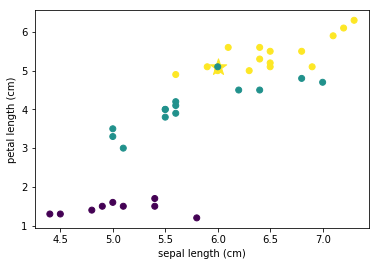

In [18]:
c1 = 0 # 산점도를 그릴 속성1
c2 = 2 # 산점도를 그릴 속성2

bad_samples = X_test[y_test != pred_y]

plt.scatter(bad_samples[:,c1], bad_samples[:,c2], marker='*',
            c=pred_y[y_test != pred_y], s=300, vmin=0, vmax=2)

plt.scatter(X_test[:,c1], X_test[:,c2], c=y_test)
plt.xlabel(iris.feature_names[c1])
plt.ylabel(iris.feature_names[c2])

- 학습데이터에서 틀린 샘플들을 산점도에 표시해 보자

In [19]:
pred_y = model.predict(X_train)
display(y_train, pred_y)

array([2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0,
       2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1,
       1, 2])

array([2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0,
       2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1,
       1, 2])

In [20]:
bad_samples = X_train[y_train != pred_y]
bad_samples

array([[4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 4.9, 1.5]])

In [21]:
y_train[y_train != pred_y]

array([2, 1])

In [22]:
pred_y[y_train != pred_y]

array([1, 2])

Text(0,0.5,'sepal width (cm)')

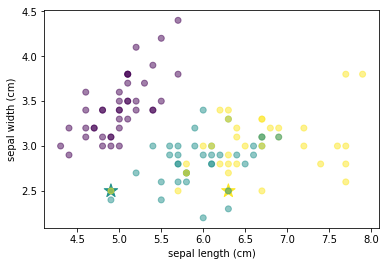

In [23]:
c1 = 0
c2 = 1

plt.scatter(bad_samples[:,c1], bad_samples[:,c2], marker='*',
            c=pred_y[y_train != pred_y], s=200, vmin=0, vmax=2)

plt.scatter(X_train[:,c1], X_train[:,c2], c=y_train, alpha=0.5)
plt.xlabel(iris.feature_names[c1])
plt.ylabel(iris.feature_names[c2])


### 속성을 2개로 제한하기
- 위의 결과는 속성 4개를 모두 사용한 결과이다.
- 속성이 2개 보다 많은 경우에는 수치적으로 해석할 수는 있지만 시각화 하기가 쉽지 않다.
- 시각화를 통해 좀 더 이해를 쉽게 하기 위해 속성을 2개로 제한해서 k-NN 을 적용해 보자.
- 먼저 모든 속성쌍 들에 대한 산점도를 그려보자.

In [24]:
### 속성 두개를 선택하여, K-NN 을 적용해 보자
iris = load_iris()
X = iris.data[:,[0,1]]
y = iris.target

X.shape, y.shape

((150, 2), (150,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
pred_y = model.predict(X_test)
(pred_y==y_test).mean()

0.8157894736842105

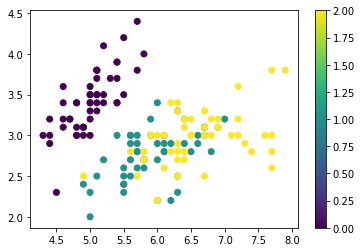

In [28]:
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
plt.colorbar()

Text(0,0.5,'sepal width (cm)')

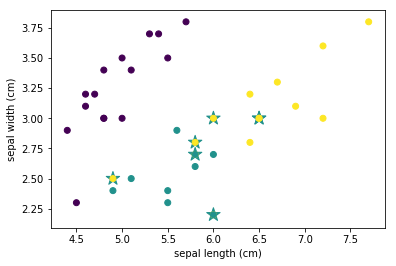

In [29]:
bad_samples = X_test[y_test != pred_y]

plt.scatter(bad_samples[:,0], bad_samples[:,1], marker='*',
            c=pred_y[y_test != pred_y], s=200, vmin=0, vmax=2)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.xlabel(iris.feature_names[c1])
plt.ylabel(iris.feature_names[c2])

- 경계 영역을 표시하기 위해 별도의 모듈을 설치하자.
- Anaconda Prompt 에서 "pip install mglearn" 실행
- "C:\[설치경로]\Anaconda3\Lib\site-packages\mglearn" 에 설치됨
- "import mglearn" 으로 설치되었음을 확인함

In [30]:
import mglearn

Text(0,0.5,'sepal width')

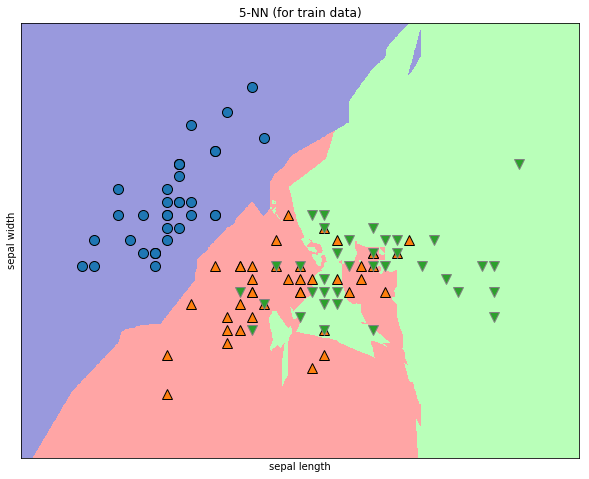

In [33]:
plt.figure(figsize=[10,8])

mglearn.plots.plot_2d_classification(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.title('5-NN (for train data)')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0,0.5,'sepal width')

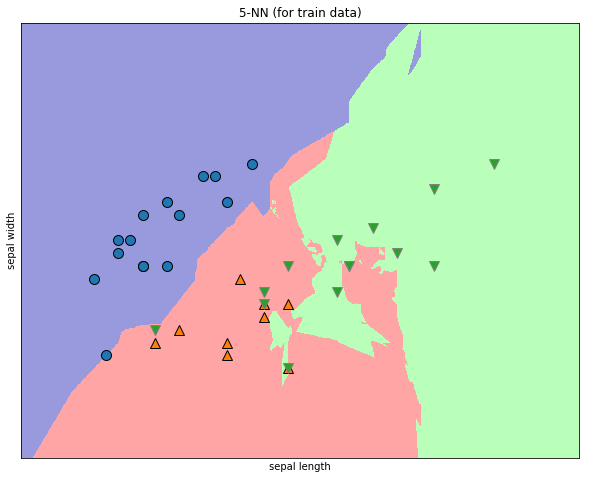

In [34]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
plt.title('5-NN (for test data)')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [35]:
# k=1 일 때,
model = KNeighborsClassifier(1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Text(0,0.5,'sepal width')

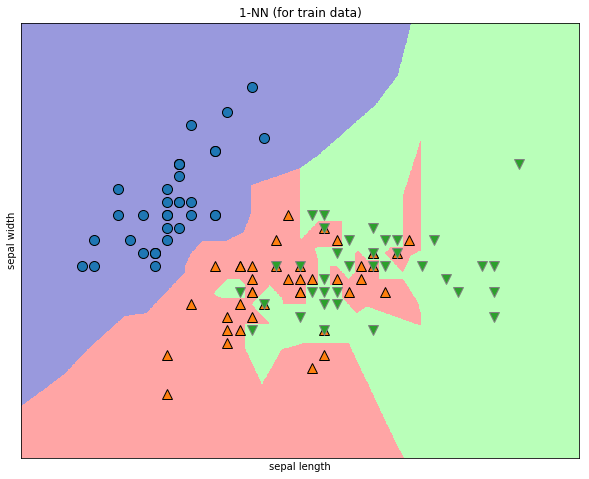

In [36]:
plt.figure(figsize=[10,8])

mglearn.plots.plot_2d_classification(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.title('1-NN (for train data)')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0,0.5,'sepal width')

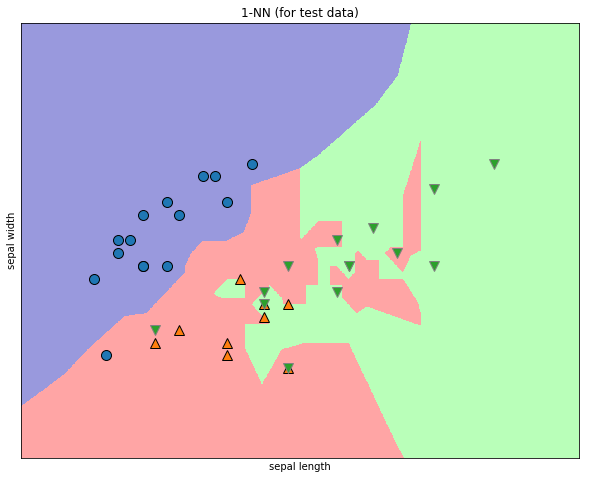

In [37]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
plt.title('1-NN (for test data)')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

- 아래 그림들은 mglearn 모듈을 사용하지 않고 직접 경계영역 표시를 구현한 것이다.

Text(0.5,1,'1-NN : iris')

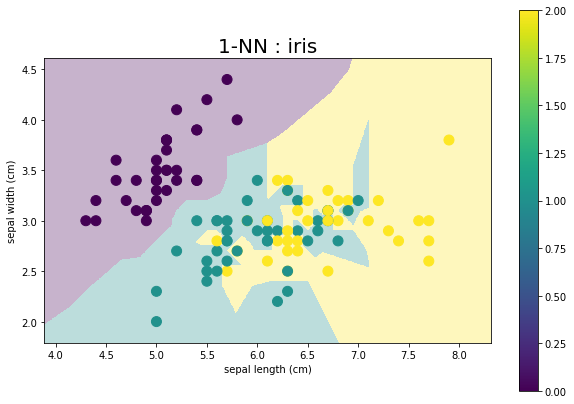

In [39]:
col1 = 0
col2 = 1

# draw boundary
scale = 1000
xmax = X_train[:,0].max() + X[:,0].std()/2
xmin = X_train[:,0].min() - X[:,0].std()/2
ymax = X_train[:,1].max() + X[:,1].std()/2
ymin = X_train[:,1].min() - X[:,1].std()/2

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig=plt.figure(figsize=[10,10])

plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.3)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=100)
plt.colorbar(shrink=0.7)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.title('1-NN : iris',fontsize=20)

### 속성 2개, k=3

In [94]:
model1 = KNeighborsClassifier(n_neighbors=1) # 1!!!
model1.fit(X_train, y_train)

score = model1.score(X_test, y_test)
display(score)

0.7368421052631579

In [95]:
model3 = KNeighborsClassifier(n_neighbors=3) # 3!!!
model3.fit(X_train, y_train)

score = model3.score(X_test, y_test)
display(score)

0.8157894736842105

In [96]:
model5 = KNeighborsClassifier(n_neighbors=5) # 5!!!
model5.fit(X_train, y_train)

score = model5.score(X_test, y_test)
display(score)

0.7894736842105263

In [97]:
model7 = KNeighborsClassifier(n_neighbors=7) # 5!!!
model7.fit(X_train, y_train)

score = model7.score(X_test, y_test)
display(score)

0.8157894736842105

In [99]:
model9 = KNeighborsClassifier(n_neighbors=9) # 5!!!
model9.fit(X_train, y_train)

score = model9.score(X_test, y_test)
display(score)

0.7894736842105263

In [104]:
model11 = KNeighborsClassifier(n_neighbors=11) # 5!!!
model11.fit(X_train, y_train)

score = model11.score(X_test, y_test)
display(score)

0.8157894736842105

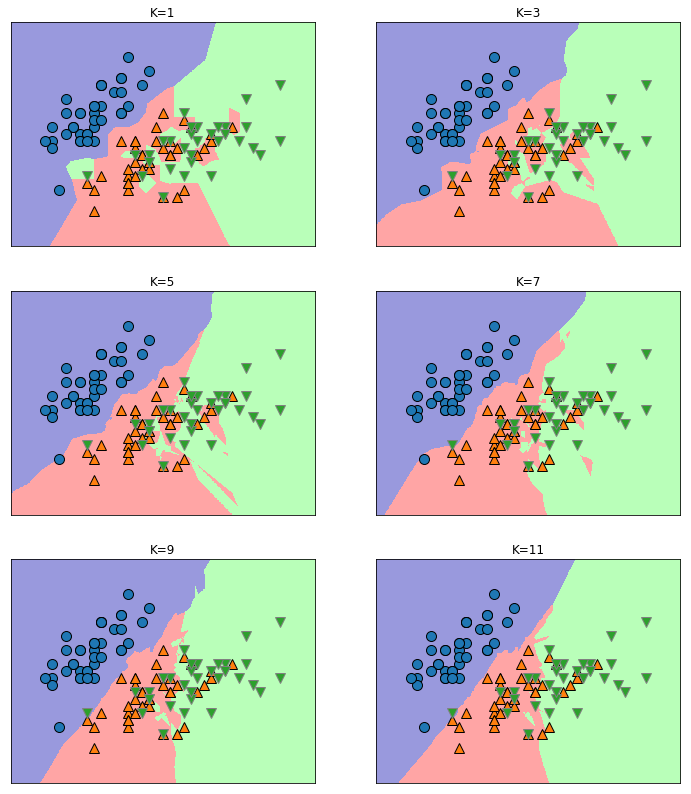

In [105]:
plt.figure(figsize=[12,14])

plt.subplot(3,2,1)
plt.title('K=1')
mglearn.plots.plot_2d_classification(model1, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.subplot(3,2,2)
plt.title('K=3')
mglearn.plots.plot_2d_classification(model3, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.subplot(3,2,3)
plt.title('K=5')
mglearn.plots.plot_2d_classification(model5, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.subplot(3,2,4)
plt.title('K=7')
mglearn.plots.plot_2d_classification(model7, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.subplot(3,2,5)
plt.title('K=9')
mglearn.plots.plot_2d_classification(model9, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.subplot(3,2,6)
plt.title('K=11')
mglearn.plots.plot_2d_classification(model11, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

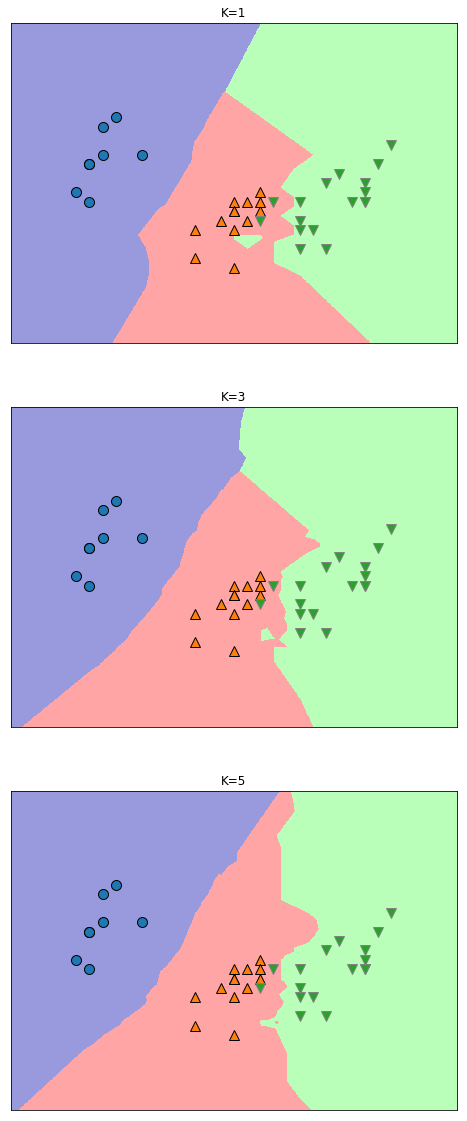

In [83]:
plt.figure(figsize=[8,20])

plt.subplot(3,1,1)
plt.title('K=1')
mglearn.plots.plot_2d_classification(model1, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

plt.subplot(3,1,2)
plt.title('K=3')
mglearn.plots.plot_2d_classification(model3, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

plt.subplot(3,1,3)
plt.title('K=5')
mglearn.plots.plot_2d_classification(model5, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

- 예측이 틀린 샘플 확인

In [48]:
pred_y = model5.predict(X_test)
pred_y

array([0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2])

In [49]:
y_test

array([0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2])

In [50]:
display(np.where(pred_y != y_test)) # 예측이 틀린 점의 index 를 출력
display(X_test[pred_y != y_test], y_test[pred_y != y_test]) # 해당 점의 좌표와 타겟값 출력
display(pred_y[pred_y != y_test])

(array([], dtype=int64),)

array([], shape=(0, 2), dtype=float64)

array([], dtype=int32)

array([], dtype=int32)

In [51]:
(pred_y==y_test).mean() # score 계산법

1.0

### KNeighborsClassifier 옵션

In [27]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their

- 위 도움말에서 주의해서 봐야 할 옵션은 **weights** 와 **metric** 이다.
- **weights** 옵션은 가까이에 있는 점 일수록 가중치를 준다고 생각하면 된다. k=3 에서 거리가 각각 (1,2,3) 이라면 가중치가 거리의 역수인 경우라면 (1/1, 1/2, 1/3) 이 된다. 첫번째 점이 class1, 두번째와 세번째 점이 class2 인 경우, 1/1 > 1/2 + 1/3 이므로 class1 으로 판정한다.
- **metric** 옵션은 두 점 사이의 거리를 재는 방식이다. 기존의 거리와 완전히 다른 새로운 방식을 적용하면 상당히 신기한 모델을 만들 수 있다. (예를 들어 너무 가까이에 있는 점들은 거리를 무한대로 주면 어떻게 될까? 또는 기존 거리에 sin 함수를 적용하면 어떻게 될까?)

### k-NN 의 특징
- k 값이 커질 수록 결정경계가 부드러워지는 것을 확인할 수 있다. 왜 그럴까?
- k 가 작으면 **과대적합**, k 가 크면 **과소적합** 인 경향을 보인다.
- 위의 예제에서, fit() 함수를 호출할 때 사실은 훈련데이터를 읽어오는 일만 하고 복잡한 작업을 거의 하지 않는다. 즉 모델을 훈련시키는 부하는 거의 없다. => **장점**
- 하지만 한 점을 예측하려고 하면, 모든 훈련데이터의 점들과 거리를 비교해야 한다. 이것은 상당히 부하가 많이 발생하는 일이므로 예측할 때 많은 시간이 소요될 수 있다. => **단점**
- k-NN 에서는 동점이 나오는 경우가 생긴다. 이럴 경우 알고리즘 내부적으로 판단한다.
- 아래에서 k 값이 변할 때, 훈련세트와 테스트세트에서 점수가 어떻게 변하는 지를 보여준다.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

model = KNeighborsClassifier(5)
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

display(score_train, score_test)

0.9821428571428571

0.9736842105263158

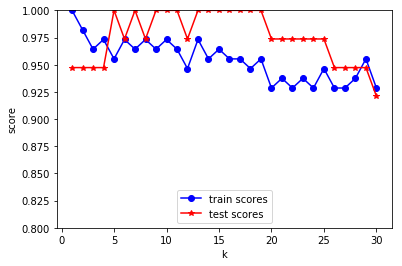

In [43]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

train_scores = []
test_scores = []

for k in range(1,31):
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    score1 = model.score(X_train, y_train)
    score2 = model.score(X_test, y_test)
    
    train_scores.append(score1)
    test_scores.append(score2)
    
plt.plot(range(1,31),train_scores,'bo-',label='train scores')
plt.plot(range(1,31),test_scores,'r*-',label='test scores')
plt.ylim(0.8,1.)
plt.xlabel('k')
plt.ylabel('score')
plt.legend(loc='lower center')